In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import pandas as pd
import time

options = Options()
options.add_experimental_option("detach", True)
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=options)

url = "http://www.daejeonbus.or.kr/sub0503.do"
driver.get(url)

In [34]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
pd.set_option('mode.chained_assignment',  None)

In [3]:
data_list = []

for page_number in range(1, 11):
    if page_number > 1:
        page_link = driver.find_element(By.XPATH, f"//a[span='{page_number}']")
        page_link.click()
        time.sleep(3)
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    titles_write_btn = [a.get_text(strip=True) for a in soup.find_all('a', class_='write-btn')]
    titles_href = [a.get_text(strip=True) for a in soup.find_all('a', href=True) if '/sub0503view.do?boardSeq=' in a['href']]

    data_list.extend(titles_write_btn)
    data_list.extend(titles_href)

crawling_df = pd.DataFrame(data_list, columns=['게시물 제목'])
crawling_df.head()

,게시물 제목
0,119번버스
1,버스 기사는 서비스업종이 아닌가요?
2,121번 노선추가 검토부탁드립니다.
3,교통카드 취소건
4,608번 노선조정 관련


In [35]:
# # Function to split text into words
# def split_text_into_words(text):
#     return text.split()

# # Apply the function to the "게시물 제목" column and store the results in a new column
# crawling_df['단어 리스트'] = crawling_df['게시물 제목'].apply(split_text_into_words)

In [63]:
# crawling_df.to_csv('crawling.csv',encoding = 'cp949')
crawling_df = pd.read_csv('crawling.csv',encoding = 'cp949')
crawling_df.drop(labels = ['Unnamed: 0'],axis = 1, inplace= True)
crawling_df.head()

,게시물 제목,단어 리스트
0,121번 노선추가 검토부탁드립니다.,노선추가
1,608번 노선조정 관련,노선조정
2,출퇴근시간버스 배차간격,배차간격
3,오늘 6시 반 탑승한 116번 대우 버스 문제점에 대하여,대우
4,동춘당 08:22 출발 103번 버스 지연 이유,지연


In [64]:
word_counts = crawling_df['단어 리스트'].value_counts().reset_index()
word_counts.columns = ['단어', '빈도']
word_counts.head()

,단어,빈도
0,배차간격,12
1,불친절,12
2,시설불만,6
3,운전,5
4,무정차,4


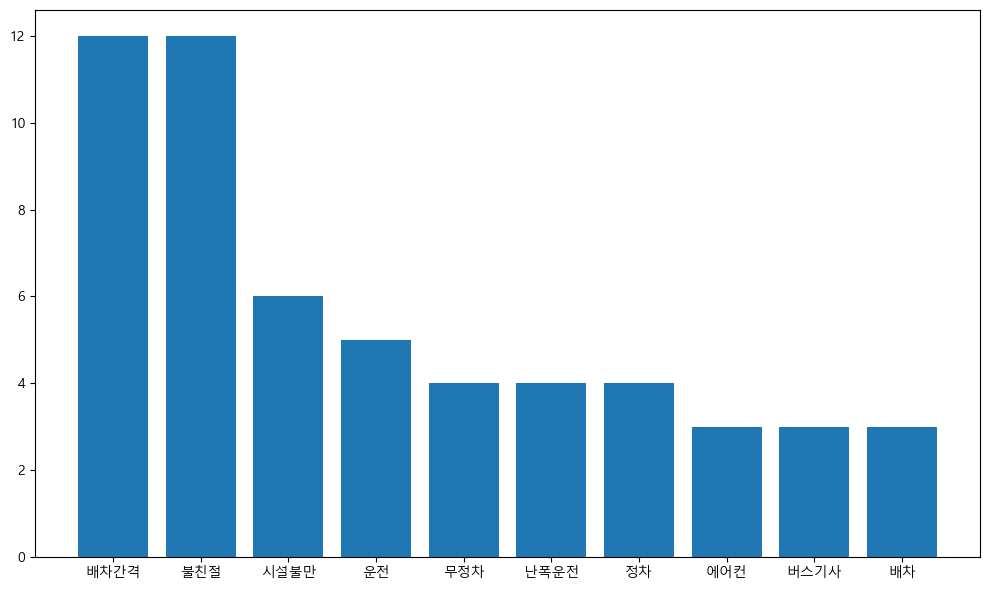

In [65]:
# Select the top 10 most frequent words
top_10_words = word_counts.head(10)

# Create a bar plot for the top 10 words
plt.figure(figsize=(10, 6))
plt.bar(top_10_words['단어'], top_10_words['빈도'])
plt.xlabel('단어')
plt.ylabel('빈도')
plt.title('상위 10개 키워드 별 빈도')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the bar plot
plt.show()

In [67]:
crawling_df.head(3)

,게시물 제목,단어 리스트
0,121번 노선추가 검토부탁드립니다.,노선추가
1,608번 노선조정 관련,노선조정
2,출퇴근시간버스 배차간격,배차간격


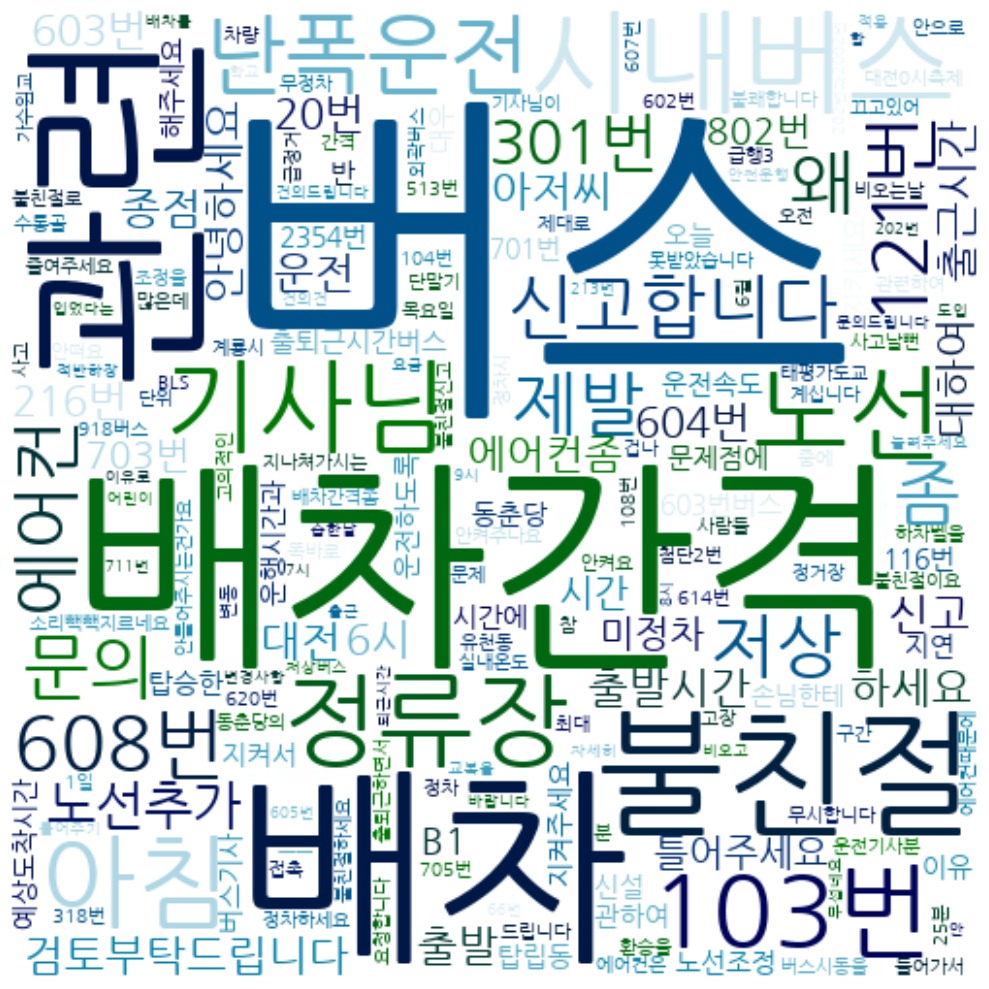

In [70]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 한글 폰트 설정
font_path = 'C:/Users/user/AppData/Local/Microsoft/Windows/Fonts/NanumGothic.ttf'  # 다운로드한 Nanum 폰트 파일의 경로로 변경해야 합니다.

# 게시물 제목 텍스트를 하나의 문자열로 합치기
titles_combined = ' '.join(crawling_df['게시물 제목'])

# WordCloud 객체 생성 (한글 폰트 설정 적용 및 색상 설정)
wordcloud = WordCloud(
    width=500,
    height=500,
    background_color='white',  # 투명한 배경
    font_path=font_path,
    colormap='ocean',
    contour_width=0,   # 여기에 원하는 seaborn colormap 이름을 입력합니다.
).generate(titles_combined)

# 그래프 그리기
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()

# 그래프 보여주기
plt.show()